# 地下検出器のCDMRを比較する
## Reference 
* Sato, Shuichi, et al. "Ultrastable performance of an underground-based laser interferometer observatory for gravitational waves." Physical Review D 69.10 (2004): 102005.
* Ohashi, M., et al. "Design and construction status of CLIO." Classical and Quantum Gravity 20.17 (2003): S599.
* Aso, Yoichi, et al. "Interferometer design of the KAGRA gravitational wave detector." Physical Review D 88.4 (2013): 043007.

In [1]:
%matplotlib inline
import numpy as np
from scipy.special import jv
import matplotlib.pyplot as plt
from miyopy.utils.trillium import Trillium

sec = 1
m = 1
mm = 1e-3*m
nm = 1e-9*m
kg = 1
g = 1e-3*kg
cm = 1e-2*m
c = 299792458*m/sec
linewidth = lambda lam,finesse: lam/(2*finesse)
stragetime = lambda armlen,finesse: (2*armlen*finesse)/(np.pi*c)
armlength = {'lism':20*m,'clio':100*m,'kagra':3000*m}
finesse = {'lism':25000,'clio':7500,'kagra':1500}
lw_lism = linewidth(1064*nm,finesse['lism'])
lw_clio = linewidth(1064*nm,finesse['clio'])
lw_kagra = linewidth(1064*nm,finesse['kagra'])
st_lism = linewidth(armlength['lism'],finesse['lism'])
st_clio = linewidth(armlength['clio'],finesse['clio'])
st_kagra = linewidth(armlength['kagra'],finesse['kagra'])

In [2]:
print('{0:3.2e}sec {1:3.2e}sec {2:3.2e}sec'.format(st_lism,st_clio,st_kagra))
print('{0:3.2e}nm {1:3.2e}nm {2:3.2e}nm'.format(lw_lism/nm,lw_clio/nm,lw_kagra/nm))

4.00e-04sec 6.67e-03sec 1.00e+00sec
2.13e-02nm 7.09e-02nm 3.55e-01nm


In [3]:
# fusud silica : 
# sapphire : 
m_lism = (2.203*g/(cm)**3)*(60*mm)*np.pi*(50*mm)**2
m_clio = (3.98*g/(cm)**3)*(60*mm)*np.pi*(100*mm)**2
m_kagra = 22.8
print("{0:3.2e}kg {1:3.2e}kg".format(m_lism,m_clio))
f_lism = 7.1e-4 #N Michimura et.al. 2017
f_clio = 7.1e-4 #N Michimura et.al. 2017
f_kagra_tm = 7.7e-6 #N Michimura et.al. 2017
f_kagra_im = 1.5e-4 #N Michimura et.al. 2017
f_kagra_mn = 8.2e-3 #N Michimura et.al. 2017
v_lism = np.sqrt(f_lism*lw_lism/m_lism)
v_clio = np.sqrt(f_clio*lw_clio/m_clio)
v_kagra_tm = np.sqrt(f_kagra_tm*lw_kagra/m_kagra)
v_kagra_im = np.sqrt(f_kagra_im*lw_kagra/m_kagra)
v_kagra_mn = np.sqrt(f_kagra_mn*lw_kagra/m_kagra)
d_lism = 4.3e-6*10 #m Michimura 2017
d_clio = 4.3e-6*10 #m Michimura 2017
d_kagra_op = 1.8e-9*10
d_kagra_im = 1.7e-8*10
d_kagra_mn = 3.9e-7*10
print("{0:3.2e} {1:3.2e}".format(v_lism,v_clio))

1.04e+00kg 7.50e+00kg
1.21e-07 8.19e-08


In [4]:
cdmr_r = lambda w,c,L: np.sqrt((1.0+jv(0,2*L*w/c))/(1.0-jv(0,2*L*w/c)))
diff = lambda w,c,L: (1.0-jv(0,2*L*w/c))
from gwpy.frequencyseries import FrequencySeries
seisnoise = FrequencySeries.read('./seisnoise/X_90.hdf5')**0.5
f = seisnoise.frequencies.value[1:]
seis = Trillium('120QA')
amp = 10**(30.0/20.0)
c2v = 20.0/2**15
seisnoise = seis.v2vel(seisnoise)*c2v/amp
#seisnoise = seisnoise/(2.0*np.pi*f)
print(seisnoise.shape,f.shape)
w = 2.0*np.pi*f
print(seisnoise.shape,f.shape)

(4096,) (4096,)
(4096,) (4096,)


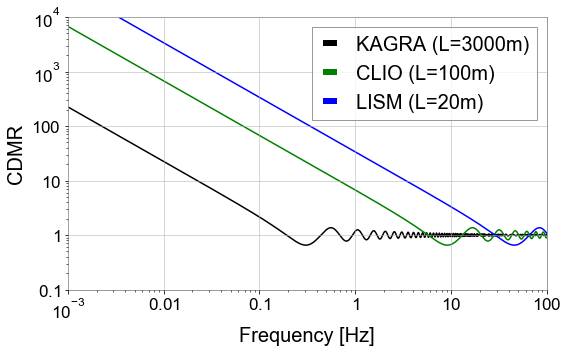

In [5]:
L = 3000
c_r = 3000.0 # m/sec
_f = np.logspace(-3,2,1000)
_w = 2.0*np.pi*_f
fig = plt.figure(figsize=(8,5))
plt.loglog(_f,cdmr_r(_w,c_r,3000),'k-',label='KAGRA (L=3000m)')
plt.loglog(_f,cdmr_r(_w,c_r,100),'g-',label='CLIO (L=100m)')
plt.loglog(_f,cdmr_r(_w,c_r,20),'b-',label='LISM (L=20m)')
plt.legend(fontsize=20)
plt.xlim(1e-3,1e2)
plt.ylim(1e-1,1e4)
plt.xlabel("Frequency [Hz]",fontsize=20)
plt.ylabel(r"CDMR",fontsize=20)
plt.tick_params(labelsize=17)
plt.tight_layout()
plt.savefig('cdmr.png')

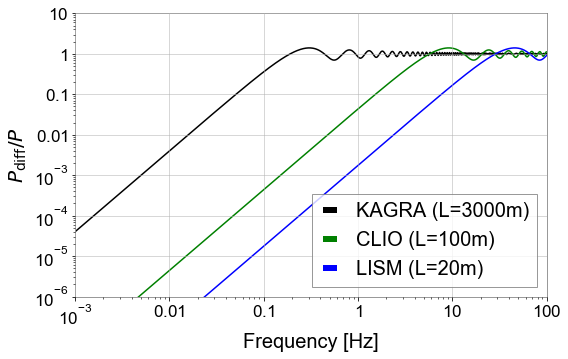

In [6]:
L = 3000
c_r = 3000.0 # m/sec
_f = np.logspace(-3,2,1000)
_w = 2.0*np.pi*_f
fig = plt.figure(figsize=(8,5))
plt.loglog(_f,diff(_w,c_r,3000),'k-',label='KAGRA (L=3000m)')
plt.loglog(_f,diff(_w,c_r,100),'g-',label='CLIO (L=100m)')
plt.loglog(_f,diff(_w,c_r,20),'b-',label='LISM (L=20m)')
plt.legend(fontsize=20)
plt.xlim(1e-3,1e2)
plt.ylim(1e-6,1e1)
plt.xlabel("Frequency [Hz]",fontsize=20)
plt.ylabel(r"$P_{\mathrm{diff}}/P$",fontsize=20)
plt.tick_params(labelsize=17)
plt.tight_layout()
plt.savefig('diff.png')

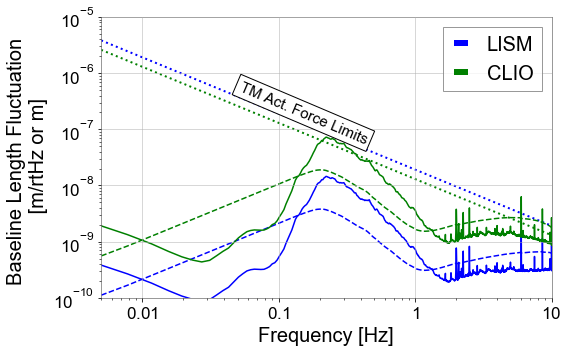

In [7]:
L = 3000
c_r = 3000.0 # m/sec
fig = plt.figure(figsize=(8,5))
if False:
    plt.loglog(f,seisnoise*np.sqrt(diff(w,c_r,3000)),'k-',label='KAGRA')
    plt.loglog(f,seisnoise.rms()*np.sqrt(diff(w,c_r,3000)),'k--')
    #plt.hlines(lw_kagra,5e-3,1,color='k',linestyle='--',linewidth=2)
if True:    
    plt.loglog(f,seisnoise*np.sqrt(diff(w,c_r,20)),'b-',label='LISM')
    plt.loglog(f,seisnoise.rms()*np.sqrt(diff(w,c_r,20)),'b--')
    #plt.hlines(d_lism,5e-3,1,color='b',linestyle='--',linewidth=2)
    plt.loglog(f,v_lism/(2.0*np.pi*f),color='blue',linestyle=':',linewidth=2)
    y1,y2 = v_lism/(2.0*np.pi*f),d_lism
    y2 = 1e-12
    #plt.fill_between(f,y1,y2,where=y1>y2,alpha=0.3,color='gray',zorder=0)
    plt.text(0.5e-1,v_lism/(2.0*np.pi*0.5e-1)*2,'TM Act. Force Limits',fontsize=15,ha='left',va='top',
             bbox=dict(facecolor='white', alpha=1),rotation=-23)

if True:    
    y1,y2 = v_clio/(2.0*np.pi*f),d_clio
    y2 = 1e-12
    #plt.fill_between(f,y1,y2,where=y1>y2,alpha=0.3,color='green',zorder=0)    
    plt.loglog(f,seisnoise*np.sqrt(diff(w,c_r,100)),'g-',label='CLIO')
    plt.loglog(f,seisnoise.rms()*np.sqrt(diff(w,c_r,100)),'g--')
    plt.loglog(f,v_clio/(2.0*np.pi*f),color='g',linestyle=':',linewidth=2)
    
plt.legend(fontsize=20)
plt.xlim(5e-3,10)
plt.ylim(1e-10,1e-5)
plt.xlabel("Frequency [Hz]",fontsize=20)
plt.ylabel("Baseline Length Fluctuation \n [m/rtHz or m]",fontsize=20)
plt.tick_params(labelsize=17)
plt.tight_layout()
plt.savefig('diff_clio_lism.png')

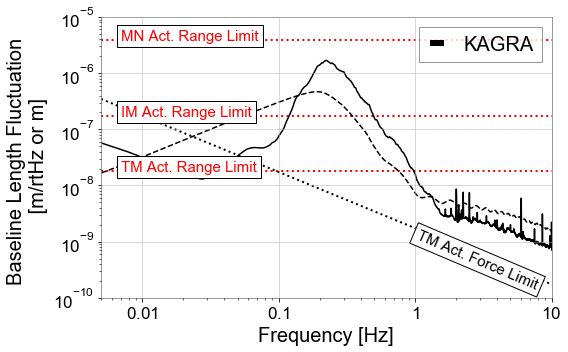

In [8]:
L = 3000
c_r = 3000.0 # m/sec
fig = plt.figure(figsize=(8,5))
if True:
    plt.hlines(d_kagra_op,5e-3,10,color='r',linestyle=':',linewidth=2)
    plt.hlines(d_kagra_im,5e-3,10,color='r',linestyle=':',linewidth=2)
    plt.hlines(d_kagra_mn,5e-3,10,color='r',linestyle=':',linewidth=2)
    plt.loglog(f,v_kagra_tm/(2.0*np.pi*f),color='k',linestyle=':',linewidth=2)
    #plt.loglog(f,v_kagra_im/(2.0*np.pi*f),color='k',linestyle=':',linewidth=2)
    #plt.loglog(f,v_kagra_mn/(2.0*np.pi*f),color='k',linestyle=':',linewidth=2)
    plt.text(0.7e-2,d_kagra_op,'TM Act. Range Limit',fontsize=15,
                 bbox=dict(facecolor='white', alpha=1),color='r')
    plt.text(0.7e-2,d_kagra_im,'IM Act. Range Limit',fontsize=15,
                 bbox=dict(facecolor='white', alpha=1),color='r')
    plt.text(0.7e-2,d_kagra_mn,'MN Act. Range Limit',fontsize=15,
                 bbox=dict(facecolor='white', alpha=1),color='r')
    #plt.loglog(f,v_kagra/(2.0*np.pi*f),color='k',linestyle=':',linewidth=2)
    plt.text(1,v_kagra_tm/(2.0*np.pi*1),'TM Act. Force Limit',fontsize=15,ha='left',va='top',
                 bbox=dict(facecolor='white', alpha=1),color='k',rotation=-23)
    plt.loglog(f,seisnoise*np.sqrt(diff(w,c_r,3000)),'k-',label='KAGRA')
    plt.loglog(f,seisnoise.rms()*np.sqrt(diff(w,c_r,3000)),'k--')
    
plt.legend(fontsize=20)
plt.xlim(5e-3,10)
plt.ylim(1e-10,1e-5)
plt.xlabel("Frequency [Hz]",fontsize=20)
plt.ylabel("Baseline Length Fluctuation \n [m/rtHz or m]",fontsize=20)
plt.tick_params(labelsize=17)
plt.tight_layout()
plt.savefig('diff_kagra.png')    